## DA 320 

| Key         | Value |
| ----------- | ----------- |
| Assignment  | Basics of Plotting Data  |
| Author   | Ted Spence        |
| Date   | 2022-10-15        |

This example notebook contains tutorials on how to plot a data set in Jupyter.

You can use the header markdown segment of this page as an example of markdown tables.

***
# Plotting a number against a date
***

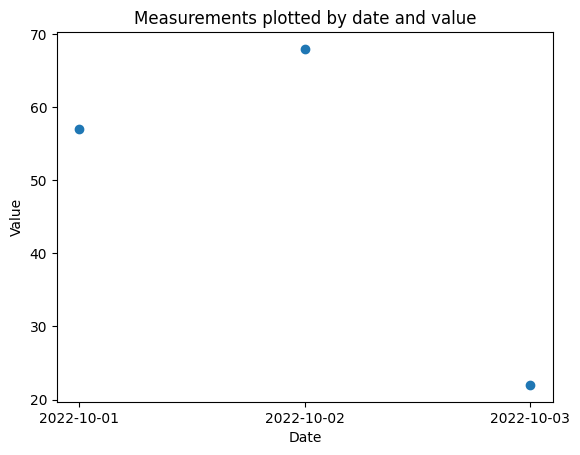

In [1]:
from matplotlib import pyplot

dataset = {
    "event_date": ["2022-10-01", "2022-10-02", "2022-10-03"],
    "score": [57, 68, 22],
}

# Plot release date by runtime
pyplot.title('Measurements plotted by date and value')
pyplot.xlabel('Date')
pyplot.ylabel('Value')
pyplot.scatter(dataset['event_date'], dataset['score'])
pyplot.show()

***
# Converting a string into a number or a date
***

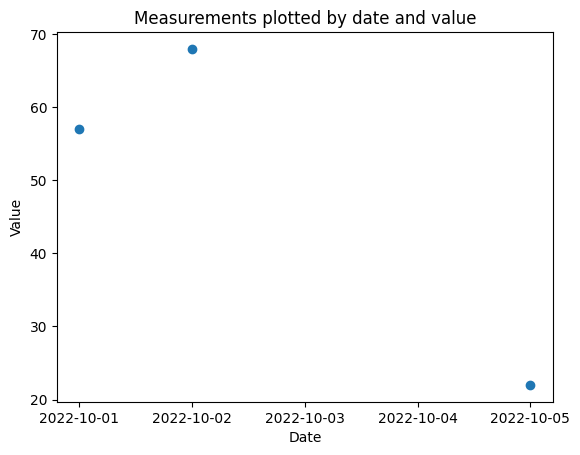

In [2]:
from matplotlib import pyplot
import pandas

dataset = {
    "event_date": ["2022-10-01", "2022-10-02", "BAD DATE", "2022-10-05"],
    "score": ["57", "68", "BAD NUMBER", "22"],
}

# Transform and standardize the columns using Pandas
dataframe = pandas.DataFrame(dataset)
dataframe.event_date = pandas.to_datetime(dataframe['event_date'], errors='coerce')
dataframe.score = pandas.to_numeric(dataframe['score'], errors='coerce')

# Plot release date by runtime
pyplot.title('Measurements plotted by date and value')
pyplot.xlabel('Date')
pyplot.ylabel('Value')
pyplot.scatter(dataframe['event_date'], dataframe['score'])
# Enforce only one tick per date on the X axis
pyplot.gca().xaxis.set_major_locator(pyplot.MultipleLocator(1))
pyplot.show()

***
# Plotting friendly currency numbers
***

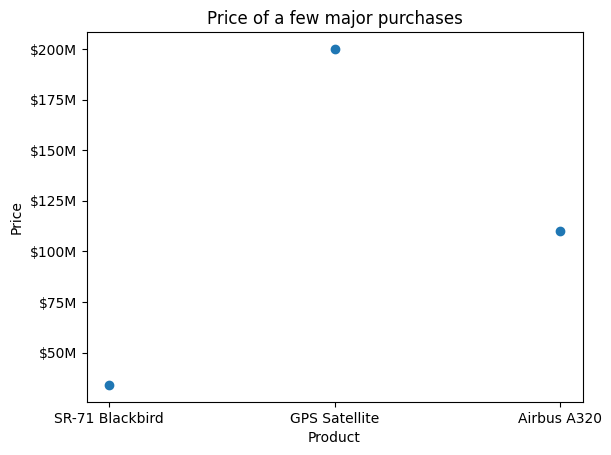

In [3]:
from matplotlib import pyplot

# Note that these costs are from different times and they don't factor inflation
dataset = {
    "product": ["SR-71 Blackbird", "GPS Satellite", "Airbus A320"],
    "cost": [34_000_000, 200_000_000, 110_000_000],
}

# A custom formatter for currency
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

# Plot release date by runtime
pyplot.title('Price of a few major purchases')
pyplot.xlabel('Product')
pyplot.ylabel('Price')
pyplot.scatter(dataset['product'], dataset['cost'])
pyplot.gca().yaxis.set_major_formatter(format_currency)
pyplot.show()

***
# Plot a frequency distribution graph
***

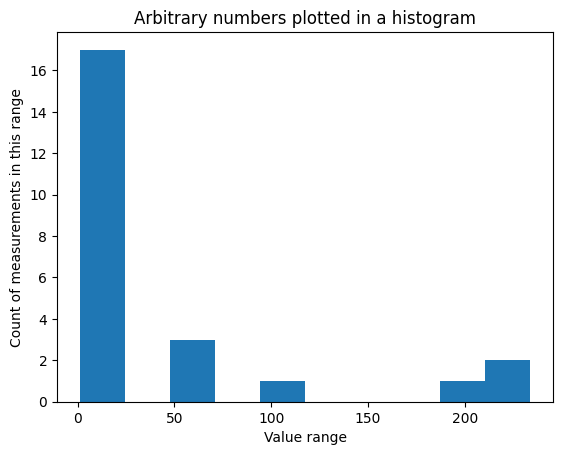

In [4]:
from matplotlib import pyplot

# A bunch of numbers
dataset = [1, 1, 1, 4, 1, 54, 53, 57, 1, 101, 199, 5, 14, 1, 4, 234, 227, 12, 1, 2, 2, 3, 1, 1]

# Plot runtimes in a distribution histogram
pyplot.title('Arbitrary numbers plotted in a histogram')
pyplot.xlabel('Value range')
pyplot.ylabel('Count of measurements in this range')
pyplot.hist(dataset, bins=10)
pyplot.show()

***
# Count number of data points by year
***

This example shows how to use a Pandas dataframe that has multiple data points in it, and to count these data points by year.

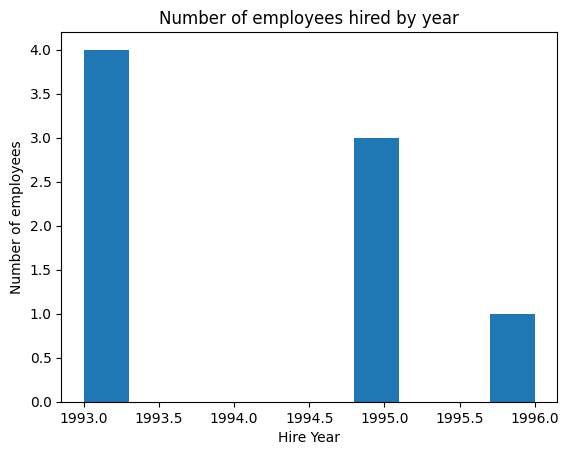

In [10]:
from matplotlib import pyplot
import pandas

# A bunch of numbers in a Pandas dataframe
employees = pandas.DataFrame({
    "hire_dates": ["1993-06-12", "1993-03-22", "1993-07-15", "1993-11-14", "1995-09-09", "1995-10-09", "1995-12-31", "1996-12-02"],
    "names": ["Alice", "Bob", "Charlie", "Dennis", "Elaine", "Frankie", "Grace", "Howard"],
})

# Extract the years from the pandas dataframe
employees["hire_dates"] = pandas.to_datetime(employees.hire_dates, errors='coerce')
employees["hire_year"] = employees["hire_dates"].dt.year
employees.head()

# Plot hire years in a distribution histogram
pyplot.title('Number of employees hired by year')
pyplot.xlabel('Hire Year')
pyplot.ylabel('Number of employees')
pyplot.hist(employees["hire_year"], bins=10)
pyplot.show()
